<a href="https://colab.research.google.com/github/Nerdward/Computer_Vision/blob/main/objectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Computer vision

/content/drive/MyDrive/Computer vision


In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/person.jpg

In [15]:
net = cv2.dnn.readNet('yolov3-tiny.weights','yolov3-tiny.cfg')

In [17]:
classes = []
with open('coco.names','r') as f:
  classes = f.read().splitlines()

In [18]:
len(classes)

80

In [19]:
img = cv2.imread('person.jpg')

blob = cv2.dnn.blobFromImage(img, 1/255,(320,320), (0,0,0), swapRB=True,crop=False)

In [28]:
height , width, _ = img.shape

In [22]:
net.setInput(blob)

In [23]:
output_layers_name = net.getUnconnectedOutLayersNames()
layeroutput = net.forward(output_layers_name)

In [31]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [32]:
len(boxes)

4

In [34]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [39]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [42]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(img ,(x,y), (x+w, y+h), color, 1)
  cv2.putText(img, label + ' ' + confi, (x,y+20), font, 2, (255,255,255),1)

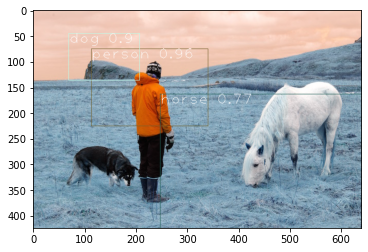

In [43]:
plt.imshow(img)